In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [5]:
data_train = pd.read_csv("train.csv")

In [6]:
data_train.shape

(333, 15)

In [7]:
data_train.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [8]:
data_train.dtypes

ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [10]:
#Checking for missing values
data_train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [12]:
data_train[data_train.isnull().any(axis=1)]

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


In [13]:
data_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


C:\Users\Ibrahim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

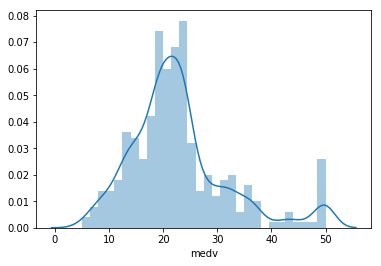

In [17]:
sns.distplot(data_train['medv'], bins=30)
plt.show

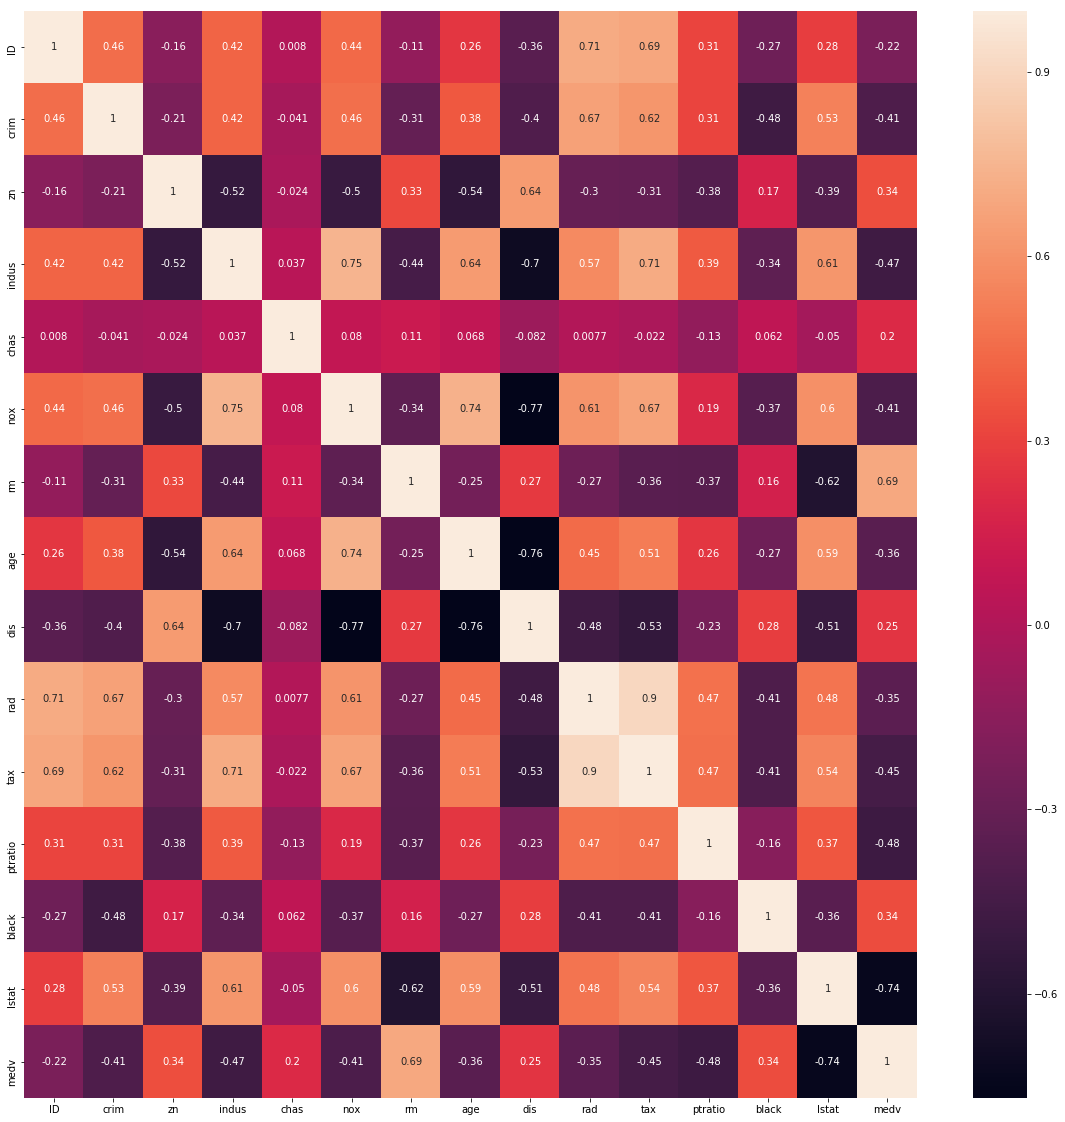

In [26]:
corr = data_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

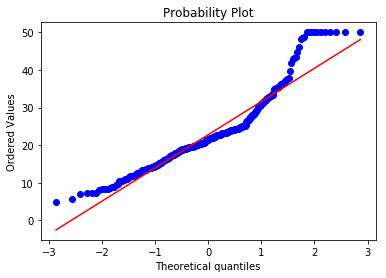

In [28]:
from scipy import stats
rest = stats.probplot(data_train['medv'], plot=plt)

In [38]:
X = data_train.drop('medv', axis=1)
y = data_train['medv']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 14)
(266,)
(67, 14)
(67,)


In [41]:
X_train.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
240,366,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12
289,446,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
139,201,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45
276,429,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
264,404,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77


In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lr.intercept_

37.068281402260524

In [50]:
predict_test = lr.predict(X_test)

In [93]:
predict_train = lr.predict(X_train)

In [94]:
predict_train

array([16.32176527, 10.81454101, 30.95628223, 13.86055121, 14.29188149,
       24.08716428, 22.59890398, 37.74694592, 17.84408956, 19.38755192,
       20.85667919, 20.9180987 , 12.16443728, 12.61244461, 20.49967308,
        7.52030381, 28.60643808, 17.26861179, 31.87031294, 24.63024551,
       26.36306653, 15.15855981, 26.27297795, 15.29376793, 30.80037172,
       25.99421234, 20.84168039, 23.61856277, 41.67325734, 23.02336849,
       19.54341301, 14.14089295, 23.8685549 , 25.64588712, 13.90072783,
       15.08553598,  2.51099944, 27.08166402, -4.57438696, 33.09082704,
       30.25839439, 20.29988531, 16.5589    , 20.86517709, 28.94677537,
       30.65177851, 13.68628291, 16.90341762, 21.02724868, 13.15417388,
       34.89185172, 12.59257674, 25.15107911, 11.9947326 , 20.87647049,
       20.61180299, 28.50129195,  8.36945973, 31.92015306, 32.64310818,
       32.90111984, 28.40733426, 20.68234363, 17.4988677 , 17.17731406,
       29.88164724, 17.19610628, 33.83411887, 36.08328433, 28.68

In [52]:
predict_test

array([25.24893179,  6.49399385, 23.10826115, 18.79931347, 24.36117611,
       26.35735516, 12.11180526, 29.02351078, 34.9990462 , 25.74290794,
       39.3670039 ,  6.99419947, 27.76052124, 19.21895149, 16.73280348,
       32.9348767 , 28.79499424, 18.96788164, 27.16493484, 17.87893558,
       22.45700576, 17.0527846 , 27.06744138, 32.14728049, 31.18553265,
       26.37880551, 19.49250063, -0.72783061, 28.10616402, 39.84658034,
       36.85508817, 31.55218772, 42.98330195, 31.44651024, 26.00424146,
       12.80554463, 12.56975468, 20.13251306, 27.8038831 , 17.89141031,
        9.86460071, 26.51481134,  7.25482933, 27.30082103, 11.95659646,
       24.36680056, 24.63961526, 17.64011605, 32.39441415, 21.4731704 ,
       34.03674558, 27.35872647, 37.67806479, 10.12266998, 27.17627363,
       24.77756813, 10.80956979, 16.8714657 , 39.19642225, 27.20795847,
       18.41997468, 26.29972852, 20.6840941 , 27.15035189, 20.63327775,
       27.60716176, 25.95907612])

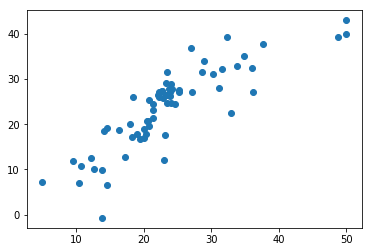

In [51]:
plt.scatter(y_test, predict_test)

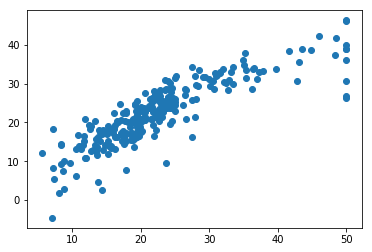

In [95]:
plt.scatter(y_train, predict_train)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
r2 = r2_score(y_test, predict_test)
rmse = (np.sqrt(mean_squared_error(y_test, predict_test)))
exv = explained_variance_score(y_test, predict_test)

r2_train = r2_score(y_train, predict_train)
rmse_train = (np.sqrt(mean_squared_error(y_train, predict_train)))
exv_train = explained_variance_score(y_train, predict_train)

In [57]:
r2

0.6850064281172803

In [98]:
r2_train

0.7387872459406767

In [99]:
rmse_train

4.73268711995155

In [60]:
exv

0.6852613330484005

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [90]:
rmse1 = (np.sqrt(mean_squared_error(y_test, predict_test)))

In [91]:
rmse1

4.883116354917019